In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [14]:
data = pd.read_csv('Countries-exercise.csv')
data

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


<function matplotlib.pyplot.show(close=None, block=None)>

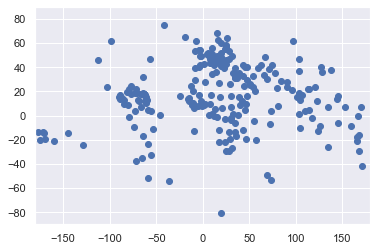

In [15]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

In [16]:
x = data.iloc[:, 1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [17]:
kmeans = KMeans(4)
clusters = kmeans.fit(x)
clusters

KMeans(n_clusters=4)

In [18]:
Identified_clusters = kmeans.fit_predict(x)
Identified_clusters

array([1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 3, 0, 1, 3, 2, 0, 0, 2, 2, 2,
       3, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 0, 0, 2, 1, 3, 2, 2,
       0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 2, 0, 2, 3, 1, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       3, 1, 3, 0, 1, 2, 1, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2,
       3, 0, 0, 0, 0, 3, 1, 1, 3, 2, 0, 3, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2,
       3, 1, 2, 2, 2, 0, 0, 1, 3, 2, 2, 2, 3, 2, 3, 3, 0, 2, 1, 0, 0, 3,
       0, 3, 2, 3, 2, 1, 1, 2, 2, 0, 3, 3, 0, 0, 1, 1, 1, 3, 3, 3, 2, 1,
       3, 2, 1, 2, 1, 0, 2, 3, 0, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 3, 0, 0, 3, 1, 1, 2,
       2, 3, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 0, 0])

In [19]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = Identified_clusters
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


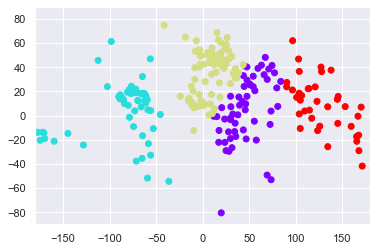

In [20]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

Selecting the number of clusters using 'THE ELBOW METHOD'

WCSS (Within-cluster sum of squares)
- kmeans.inertia is a sklearn function used to find the WCSS

In [22]:
kmeans.inertia_

256590.585754061

Creating a series of wcss value and plotting against probable number of clusters to find the suitable number of clusters

In [23]:
wcss = []

for i in range(1,7):
    kmeans = KMeans(1)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

C:\Users\Damilola Shobowale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Damilola Shobowale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Damilola Shobowale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Damilola Shobowale\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarn

[1413859.6798344273,
 1413859.6798344273,
 1413859.6798344273,
 1413859.6798344273,
 1413859.6798344273,
 1413859.6798344273]